<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Import Some Important Libraries:
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
import cv2
from tqdm import tqdm
import random
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     BatchNormalization, Activation, Resizing)
from tensorflow.keras.applications import MobileNetV2


In [2]:
DATASET_PATH = "/kaggle/input/gtsrb-german-traffic-sign"
IMG_SIZE = 32  
NUM_CLASSES = 43
EPOCHS = 20
BATCH_SIZE = 64

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Load our data:
</div>

In [3]:
train_df = pd.read_csv(os.path.join(DATASET_PATH, "Train.csv"))
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
# Label Mapping
classes = { 
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 
    4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 
    8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 
    12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 
    18: 'General caution', 19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 22: 'Bumpy road', 
    23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 
    28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 
    32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 
    36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 
    40: 'Roundabout mandatory', 41: 'End of no passing', 42: 'End no passing veh > 3.5 tons'
}


In [5]:
X, y = [], []

# Load images
for i in tqdm(range(len(train_df))):
    img_path = os.path.join(DATASET_PATH, train_df.loc[i, "Path"])  

    if not os.path.exists(img_path):
        print(f" Missing file: {img_path}")
        continue

    image = cv2.imread(img_path)
    if image is None:
        print(f" Corrupted file: {img_path}")
        continue

    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  
    X.append(image)
    y.append(train_df.loc[i, "ClassId"])

print(f" Successfully loaded {len(X)} images!")

100%|██████████| 39209/39209 [06:07<00:00, 106.72it/s]

 Successfully loaded 39209 images!


In [6]:
X = np.array(X) / 255.0  
y = to_categorical(np.array(y), NUM_CLASSES)  

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Let's have information about the dataset:
</div>

In [7]:
y_original = np.array([train_df.loc[i, "ClassId"] for i in range(len(train_df))])  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_original)


print(f" Loaded {len(X_train)} training and {len(X_val)} validation images!")

 Loaded 31367 training and 7842 validation images!


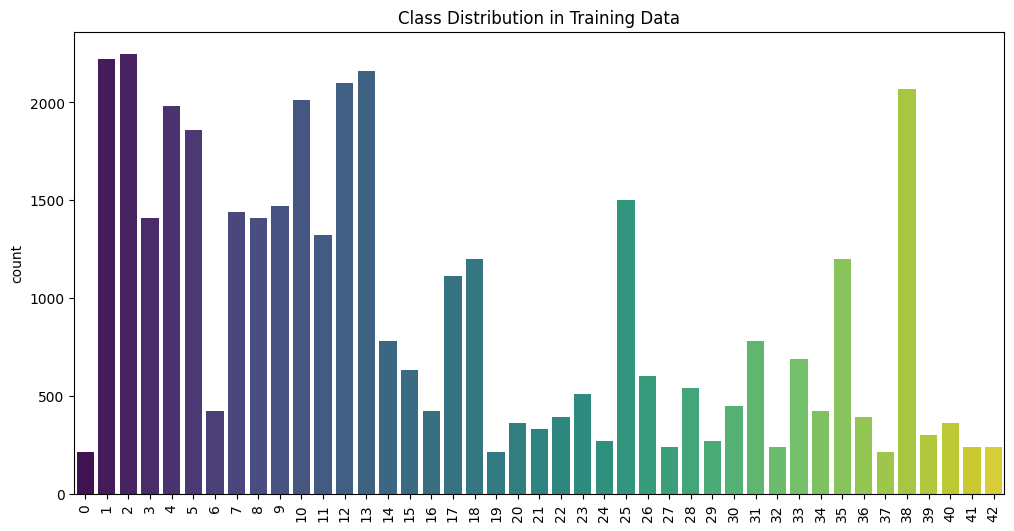

In [8]:
import seaborn as sns
y_labels = np.argmax(y, axis=1)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_labels, palette="viridis")
plt.xticks(rotation=90)
plt.title("Class Distribution in Training Data")
plt.show()


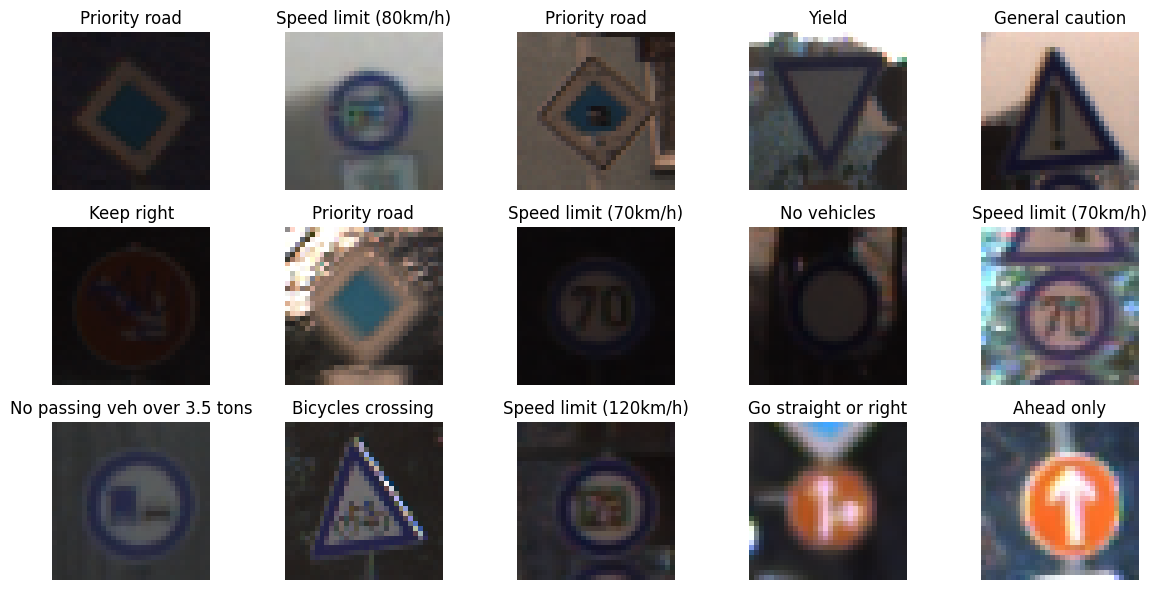

In [9]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(classes[np.argmax(y_train[i])]) 
    plt.axis("off")
plt.tight_layout()
plt.show()


<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Modeling:
</div>

In [10]:
def build_model1():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(43, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model2():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Dropout(0.25),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(43, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model3():  
    model = Sequential([
        Conv2D(64, (3,3), padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(43, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Model 4: Transfer Learning (MobileNetV2)
def build_model4():
    base = MobileNetV2(include_top=False, input_shape=(96, 96, 3), weights='imagenet', pooling='avg')
    base.trainable = False
    model = Sequential([
        Resizing(96, 96),
        base,
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Train model1
model1 = build_model1()
history1 = model1.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4870 - loss: 2.0625 - val_accuracy: 0.8790 - val_loss: 0.4613
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9217 - loss: 0.3349 - val_accuracy: 0.9374 - val_loss: 0.2471
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9607 - loss: 0.1722 - val_accuracy: 0.9607 - val_loss: 0.1623
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.1107 - val_accuracy: 0.9665 - val_loss: 0.1383
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0801 - val_accuracy: 0.9700 - val_loss: 0.1302
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0604 - val_accuracy: 0.9744 - val_loss: 0.1110
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0439 - val_accuracy: 0.9699 - val_loss: 0.1400
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0619 - val_accuracy: 0.

In [12]:
# Train model2
model2 = build_model2()
history2 = model2.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4537 - loss: 2.0618 - val_accuracy: 0.9558 - val_loss: 0.2126
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8869 - loss: 0.3745 - val_accuracy: 0.9797 - val_loss: 0.0937
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9382 - loss: 0.1986 - val_accuracy: 0.9852 - val_loss: 0.0650
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9569 - loss: 0.1422 - val_accuracy: 0.9887 - val_loss: 0.0519
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9674 - loss: 0.1026 - val_accuracy: 0.9892 - val_loss: 0.0455
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9723 - loss: 0.0890 - val_accuracy: 0.9921 - val_loss: 0.0356
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9731 - loss: 0.0809 - val_accuracy: 0.9903 - val_loss: 0.0436
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9769 - loss: 0.0756 - val_accuracy: 

In [13]:
# Train model3
model3 = build_model3()
history3 = model3.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2459 - loss: 3.0175 - val_accuracy: 0.7378 - val_loss: 0.9472
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6467 - loss: 1.0430 - val_accuracy: 0.8965 - val_loss: 0.3715
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7396 - loss: 0.7612 - val_accuracy: 0.9450 - val_loss: 0.2561
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7809 - loss: 0.6439 - val_accuracy: 0.9461 - val_loss: 0.2539
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7929 - loss: 0.5962 - val_accuracy: 0.9568 - val_loss: 0.1660
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8109 - loss: 0.5551 - val_accuracy: 0.9677 - val_loss: 0.1660
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8256 - loss: 0.5037 - val_accuracy: 0.9611 - val_loss: 0.1586
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8198 - loss: 0.5166 - val_accuracy: 

In [14]:
# Train model4
model4 = build_model4()
history4 = model4.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.4348 - loss: 2.0337 - val_accuracy: 0.7632 - val_loss: 0.7931
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7283 - loss: 0.8529 - val_accuracy: 0.8462 - val_loss: 0.5315
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7969 - loss: 0.6300 - val_accuracy: 0.8588 - val_loss: 0.4426
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8359 - loss: 0.5067 - val_accuracy: 0.8822 - val_loss: 0.3735
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8545 - loss: 0.4453 - val_accuracy: 0.8912 - val_loss: 0.3343
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8762 - loss: 0.3776 - val_accuracy: 0.8981 - val_loss: 0.3035
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8888 - loss: 0.3408 - val_accuracy: 0.9104 - val_loss: 0.2817
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms

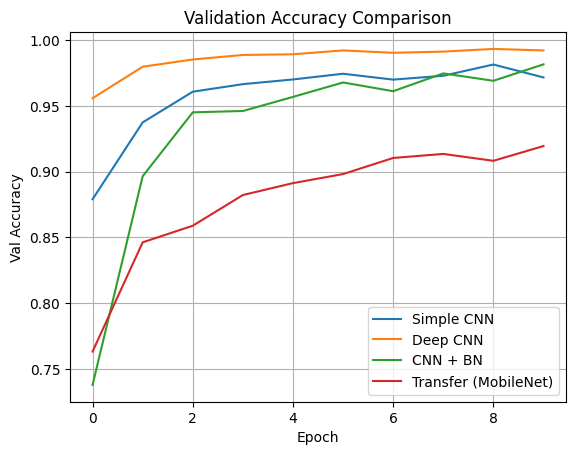

In [15]:
# Compare Validation Accuracy
def plot_histories(histories, title='Validation Accuracy Comparison'):
    for name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=name)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Val Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_histories({
    'Simple CNN': history1,
    'Deep CNN': history2,
    'CNN + BN': history3,
    'Transfer (MobileNet)': history4
})



In [16]:
test_df = pd.read_csv(os.path.join(DATASET_PATH, "Test.csv"))

X_test, y_test = [], []
for i in tqdm(range(len(test_df))):
    img_path = os.path.join(DATASET_PATH, test_df.loc[i, "Path"])
    image = cv2.imread(img_path)
    
    if image is None:
        print(f" Skipping corrupted file: {img_path}")
        continue

    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    X_test.append(image)
    y_test.append(test_df.loc[i, "ClassId"])

100%|██████████| 12630/12630 [02:05<00:00, 100.49it/s]


In [17]:

X_test = np.array(X_test) / 255.0
y_test = to_categorical(np.array(y_test), NUM_CLASSES)

In [18]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.1442
Test Accuracy: 96.35%


# So the best one is Deep CNN ,Let's try make it better

In [19]:
from tensorflow.keras import layers, models, callbacks, optimizers

def build_deepcnn_model(input_shape=(32, 32, 3), num_classes=43):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile model
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [20]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


In [21]:
model_deepcnn = build_deepcnn_model()

history_deepcnn = model_deepcnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop, lr_schedule]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.6523 - loss: 1.3992 - val_accuracy: 0.9021 - val_loss: 0.3806 - learning_rate: 0.0010
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9750 - loss: 0.0965 - val_accuracy: 0.9946 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 3/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9903 - loss: 0.0375 - val_accuracy: 0.9887 - val_loss: 0.0445 - learning_rate: 0.0010
Epoch 4/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9944 - loss: 0.0222 - val_accuracy: 0.9954 - val_loss: 0.0180 - learning_rate: 0.0010
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9891 - loss: 0.0386 - val_accuracy: 0.9960 - val_loss: 0.0145 - learning_rate: 0.0010
Epoch 6/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9963 - loss: 0.0141 - val_accuracy: 0.9952 - val_loss: 0.0174 - learning_rate: 0.0010
Epoch 7/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9963 - loss: 0

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Evaluation:
</div>

In [22]:
test_loss, test_acc = model_deepcnn.evaluate(X_test, y_test)
print(f"Fine-tuned Deep CNN Test Accuracy: {test_acc * 100:.2f}%")


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0455
Fine-tuned Deep CNN Test Accuracy: 98.98%


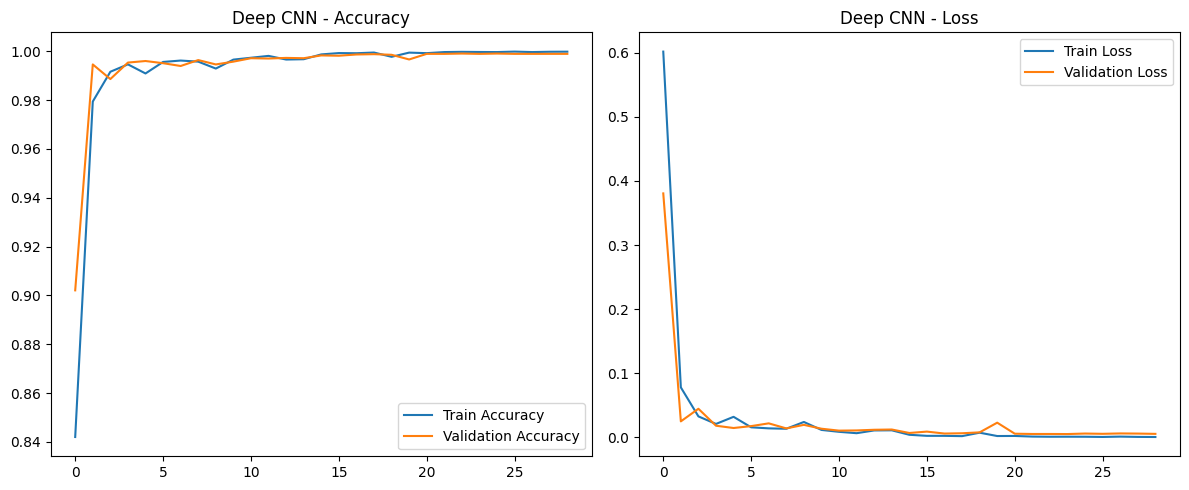

In [23]:

def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{title} - Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example:
plot_history(history_deepcnn, "Deep CNN")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


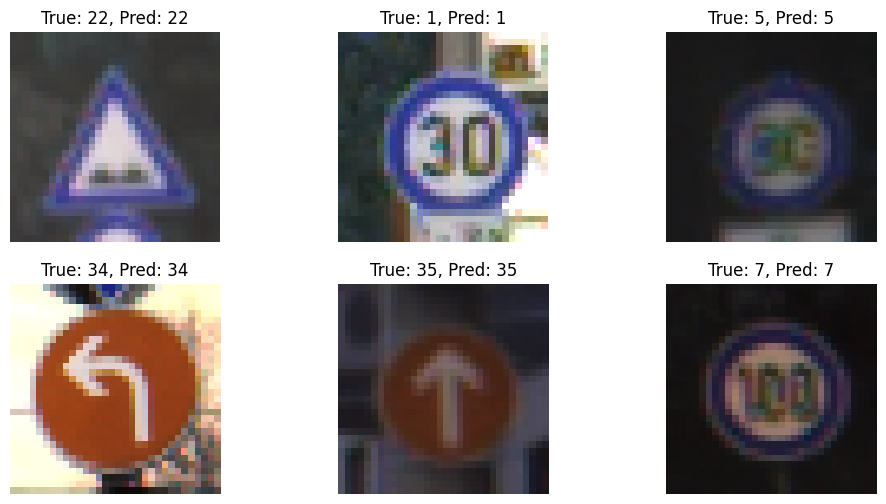

In [24]:
# Visualize Predictions
def plot_predictions(model, X, y, num_samples=6):
    plt.figure(figsize=(12, 6))
    indices = random.sample(range(len(X)), num_samples)
    for i, idx in enumerate(indices):
        img = X[idx]
        true_label = np.argmax(y[idx])
        pred_label = np.argmax(model.predict(img.reshape(1, IMG_SIZE, IMG_SIZE, 3)))
        
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label}, Pred: {pred_label}")
        plt.axis("off")
    plt.show()

plot_predictions(model_deepcnn, X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


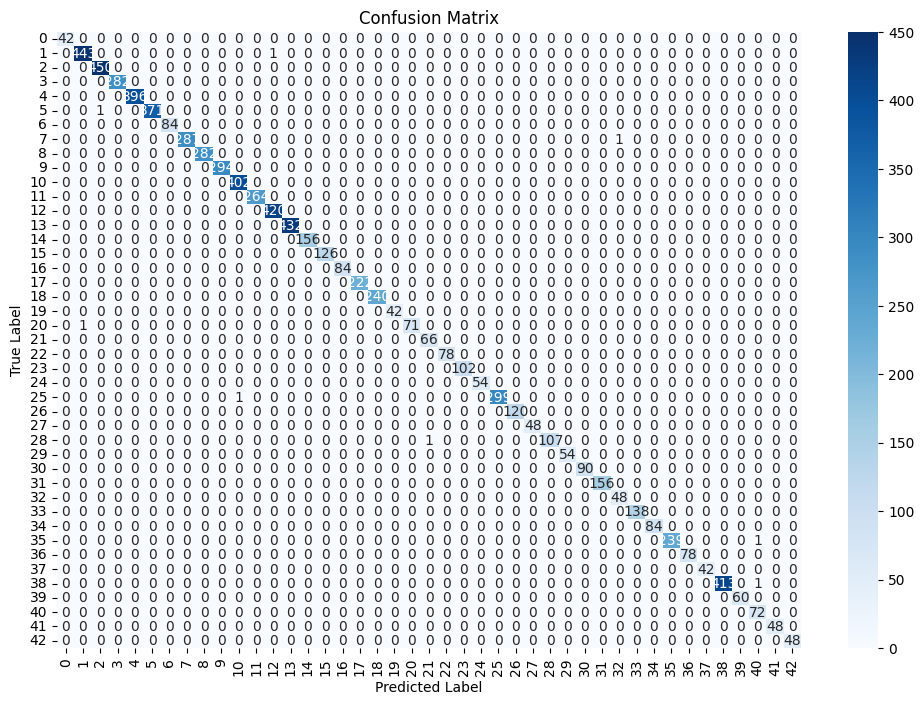

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = np.argmax(model_deepcnn.predict(X_val), axis=1)

# Convert y_val back from one-hot encoding to class labels
y_true = np.argmax(y_val, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [26]:
from sklearn.metrics import classification_report

# Convert y_val from one-hot encoding to class labels
y_true = np.argmax(y_val, axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=[classes[i] for i in range(43)]))



                               precision    recall  f1-score   support

         Speed limit (20km/h)       1.00      1.00      1.00        42
         Speed limit (30km/h)       1.00      1.00      1.00       444
         Speed limit (50km/h)       1.00      1.00      1.00       450
         Speed limit (60km/h)       1.00      1.00      1.00       282
         Speed limit (70km/h)       1.00      1.00      1.00       396
         Speed limit (80km/h)       1.00      1.00      1.00       372
  End of speed limit (80km/h)       1.00      1.00      1.00        84
        Speed limit (100km/h)       1.00      1.00      1.00       288
        Speed limit (120km/h)       1.00      1.00      1.00       282
                   No passing       1.00      1.00      1.00       294
 No passing veh over 3.5 tons       1.00      1.00      1.00       402
 Right-of-way at intersection       1.00      1.00      1.00       264
                Priority road       1.00      1.00      1.00       420
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


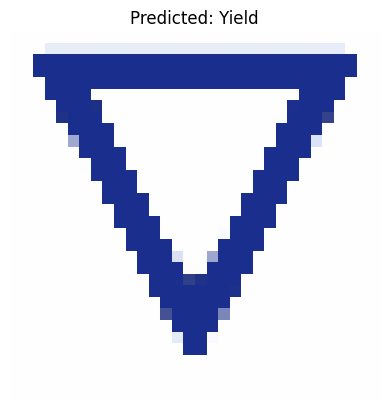

In [27]:


# Path to the input image
image_path = "/kaggle/input/newsign/ylde.jpg"
IMG_SIZE = 32  # or 64 depending on your model

# Load and preprocess the image
image = cv2.imread(image_path)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_input = image / 255.0
image_input = np.expand_dims(image_input, axis=0)

# Predict the class
prediction = model_deepcnn.predict(image_input)
predicted_class = np.argmax(prediction)
predicted_label = classes[predicted_class]

# Display the image with prediction
plt.imshow(image_rgb)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


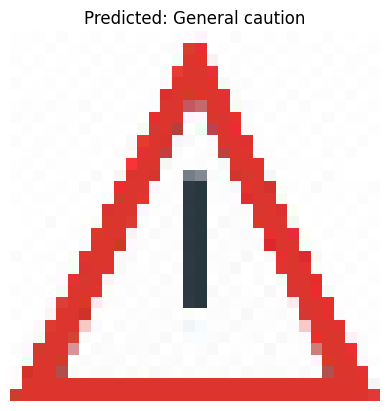

In [28]:
# Path to the input image
image_path = "/kaggle/input/signs4/cau.jpg"
IMG_SIZE = 32  # or 64 depending on your model

# Load and preprocess the image
image = cv2.imread(image_path)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_input = image / 255.0
image_input = np.expand_dims(image_input, axis=0)

# Predict the class
prediction = model_deepcnn.predict(image_input)
predicted_class = np.argmax(prediction)
predicted_label = classes[predicted_class]

# Display the image with prediction
plt.imshow(image_rgb)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

<div style="
    padding: 15px; 
    color: #377eb8; /* Pastel blue */
    font-weight: bold; 
    font-size: 20px; 
    font-family: 'Arial', sans-serif; /* Clean, simple font for contrast */
    text-align: left; /* Left-aligned */
    background-color: #f7f4f9; /* Soft pastel lavender background */
    margin-top: 10px; /* Space between title and subtitle */
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); /* Adding a soft shadow effect */
">
    Saving Model:
</div>

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_deepcnn)
tflite_model = converter.convert()

# Save the converted model
with open("traffic_sign_classifier.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpnwakbrmo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_189')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  135160212810992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212291824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212295168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212295696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212293232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212294464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212298688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212296752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212297104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135160212298512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13516021229